In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# Main Performance plot (The helper function to get the mse_min for Tandem and NN)

In [15]:
# Generate the mse_min_list.txt and mse_quan2575_list.txt for Tandem and naive inverse 
dataset = ['Yang','Chen','Peurifoy']
min_list_name = 'mse_min_list.txt'
quan2575_list_name = 'mse_quan2575_list.txt'
method_list = ['Tandem','NN']
directory_pos = {'Tandem': '/home/sr365/MM_Bench/Tandem/data', 
                'NN': '/home/sr365/MM_Bench/inverse/data'}
for data in dataset:
    print('working on dataset', data)
    for method in method_list:
        print('working on method', method)
        # Get the directory
        directory = directory_pos[method]
        # Loop over the whole thing to find Ypred and Ytruth
        for file in os.listdir(directory):
            if data in file and 'Ypred' in file:
                print(directory)
                print(file)
                Yp = pd.read_csv(os.path.join(directory, file), sep=' ', header=None).values
                Yt = pd.read_csv(os.path.join(directory, file.replace('Ypred','Ytruth')), sep=' ', header=None).values
                mse = np.mean(np.square(Yt - Yp), axis=1)
                # Calculate the mse stats from mse list
                mse_25_percent = np.percentile(mse, 25)*np.ones([1, 200])
                mse_75_percent = np.percentile(mse, 75)*np.ones([1, 200])
                mean_mse = np.mean(mse)*np.ones([200,1])
                mse_quan_2575 = np.concatenate([mse_25_percent, mse_75_percent], axis=0)
                print(np.shape(mse_quan_2575))
                # Change the name to keep the same with other multi-eval
                if data == 'Yang':
                    data = 'Yang_sim'
                # Create dir
                if not os.path.isdir(os.path.join(method, data)):
                    os.makedirs(os.path.join(method, data))
                # Write the list down
                np.savetxt(os.path.join(method, data, min_list_name), mean_mse)
                np.savetxt(os.path.join(method, data, quan2575_list_name), mse_quan_2575)
                break

working on dataset Yang
working on method Tandem
/home/sr365/MM_Bench/Tandem/data
test_Ypred_Yang_best_model.csv
(2, 200)
working on method NN
/home/sr365/MM_Bench/inverse/data
test_Ypred_Yang_best_model.csv
(2, 200)
working on dataset Chen
working on method Tandem
/home/sr365/MM_Bench/Tandem/data
test_Ypred_Chen_best_model.csv
(2, 200)
working on method NN
/home/sr365/MM_Bench/inverse/data
test_Ypred_Chen_best_model.csv
(2, 200)
working on dataset Peurifoy
working on method Tandem
/home/sr365/MM_Bench/Tandem/data
test_Ypred_Peurifoy_best_model.csv
(2, 200)
working on method NN
/home/sr365/MM_Bench/inverse/data
test_Ypred_Peurifoy_best_model.csv
(2, 200)


# Detailed spectra plots

In [2]:
# The deatiled plot for Top 3 methods
#method_list = {'Chen':['NA','VAE','GA'], 'Peurifoy':['NA','VAE','GA'], 'Yang_sim':['NA','VAE','GA']}
method_list = {'Chen':['VAE','Tandem','NN','NA','GA','MDN'], 'Peurifoy':['VAE','Tandem','NN','NA','GA','MDN'], 'Yang_sim':['VAE','Tandem','NN','NA','GA','MDN']}
#method_list = {'Chen':['VAE','Tandem','NN','MDN'], 'Peurifoy':['VAE','Tandem','NN','MDN'], 'Yang_sim':['VAE','Tandem','NN','MDN']}
#method_list = {'Chen':['NA','GA'], 'Peurifoy':['NA','GA'], 'Yang_sim':['NA','GA']}


# This is taken from the table as the T=200 solution
#MSE_dict = {'Chen': {'VAE': 2.46e-7, 'NA': 3.03e-7, 'GA': 3.03e-7}, 
#            'Peurifoy':{'NA':1.58e-3,'VAE': 1.91e-3,'GA': 3.02e-3},
#            'Yang_sim':{'NA':3e-4,'GA':6.73e-4,'VAE':0.39e-3}}
MSE_dict = {'Chen': {'VAE': 2.46e-7, 'NA': 3.03e-7, 'GA': 3.03e-7}, 
            'Peurifoy':{'NA':1.58e-3,'VAE': 1.91e-3,'GA': 3.02e-3},
            'Yang_sim':{'NA':3e-4,'GA':6.73e-4,'VAE':0.39e-3}}
dataset = ['Peurifoy','Chen','Yang_sim']
mse_mat_name = 'mse_mat.csv'

shape of Yt =  (500, 201)
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
0
Peurifoy VAE
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
1
Peurifoy Tandem
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
2
Peurifoy NN
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
3
Peurifoy NA
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
4
Peurifoy GA
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
5
Peurifoy MDN
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
shape of Yt =  (500, 256)
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
0
Chen VAE
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA', 'MDN']
1
Chen Tandem
(200, 500)
here (500,)
Spectra_id 300
Spectra_number 199
['VAE', 'Tandem', 'NN', 'NA', 'GA

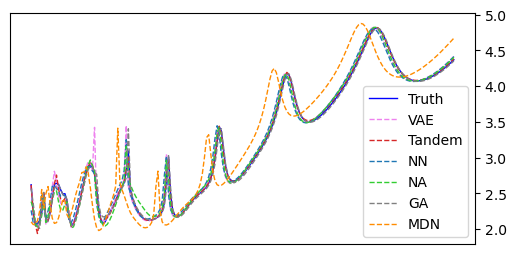

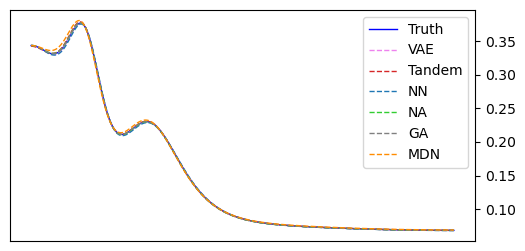

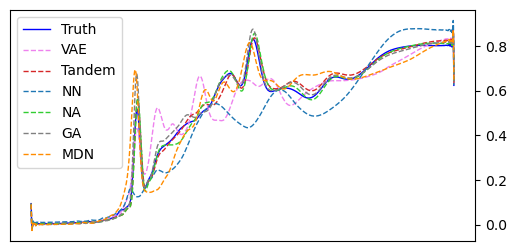

In [26]:
# dataset = ['Chen']
spectra_id_dict = {'Chen':0, 'Peurifoy': 0, 'Yang_sim':12}
similar_thres = 0.1
working_ones = []
color_dict = {"VAE": "violet","cINN":"chocolate", "INN":"skyblue", "NA": "limegreen",
                        "MDN": "darkorange", "NN":"tab:blue", "GA":"grey", "Tandem":"tab:red"}
results_dict = "/home/yw/Documents/oscar_work/AEM_DIM_Bench/mm_bench_multi_eval/"

# for spectra_ii in range(50):
#     number_qualified = []
#     spectra_id_dict['Yang_sim'] = spectra_ii
for data in dataset:
    spectra_id = 300#spectra_id_dict[data]
    # Get the plot
    f = plt.figure(figsize=[6,3])
    Yt = pd.read_csv(os.path.join(results_dict,method_list[data][0], data, 'Ytruth.csv'), header=None, sep=' ').values
    print('shape of Yt = ', np.shape(Yt))
    plt.plot(Yt[spectra_id, :],label='Truth', linewidth=1,c='b')
    # Get the top 3 methods
    top_3_methods = method_list[data]
    
    for i in range(len(method_list[data])):
        print(top_3_methods)
        print(i)
        method =  top_3_methods[i]
        print(data,method)
        # read the MSE mat
        # if 'Yang' in data and 'NA' in method:
        #     mse_mat = pd.read_csv(os.path.join('/home/sr365/MM_bench_multi_eval/NA_RMSprop/Yang_sim/', mse_mat_name), header=None, sep=' ').values
        # else:
        mse_mat = pd.read_csv(os.path.join(results_dict,method, data, mse_mat_name), header=None, sep=' ').values
        print(np.shape(mse_mat))

        
        # Get the threshold
        #mse_thres = MSE_dict[data][method]
        # use this threshold to select
        #OSCAR WORKING HERE!!!!
        mse_min = pd.read_fwf(os.path.join(results_dict,method, data, "mse_min_list.txt"), header=None, sep=' ').values

        the_min_inx = 199#np.argmin(mse_min)


        the_min_min_inx = 300#np.argmin(mse_mat[the_min_inx,:])
        
        print("here",np.shape(mse_mat[the_min_inx,:]))
        
        
        
        
        spectra_id = the_min_min_inx
        spectra_number = the_min_inx

        print("Spectra_id",spectra_id)
        print("Spectra_number",spectra_number)


        if 'GA' not in method and 'NA' not in method:
            if 'Yang' not in data:
                Ypred = pd.read_csv(os.path.join(results_dict,
                                                 method, 
                                                 data, 
                                                 'test_Ypred_new_best_{}inference{}.csv'.format(data, spectra_number)), header=None, sep=' ').values
            else:
                Ypred = pd.read_csv(os.path.join(results_dict,
                                                 method, 
                                                 data, 
                                                 'test_Ypred_new_best_Yanginference{}.csv'.format(spectra_number)), header=None, sep=' ').values
                
            plt.plot(Ypred[spectra_id, :],'--',label=method, linewidth=1, c=color_dict[method])
        else:
            if 'Yang' not in data:
                Ypred = pd.read_csv(os.path.join(results_dict,
                                                 method, 
                                                 data, 
                                                 'test_Ypred_pointnew_best_{}inference{}.csv'.format(data, spectra_id)), header=None, sep=' ').values
            else:
                Ypred = pd.read_csv(os.path.join(results_dict,
                                                 method, 
                                                 data, 
                                                 'test_Ypred_pointnew_best_Yanginference{}.csv'.format(spectra_id)), header=None, sep=' ').values
            plt.plot(Ypred[spectra_number, :],'--',label=method, linewidth=1, c=color_dict[method])
            




        
        
        
    plt.legend()
    plt.xticks([])
    ax = plt.gca()
    ax.yaxis.tick_right()
    plt.savefig('{}_plot.png'.format(data), dpi=300)
